# DNN: analysis with Keras of 2D data

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib as mpl
mpl.rc('image', cmap='copper')
import matplotlib.pyplot as plt
# default font
plt.rcParams['font.size'] = 15

%run nonlinear_function.py

# training data
perc_train = 0.8

2023-03-08 15:29:52.307754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 15:29:52.408349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-08 15:29:52.408363: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-08 15:29:52.816296: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 1.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 0.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

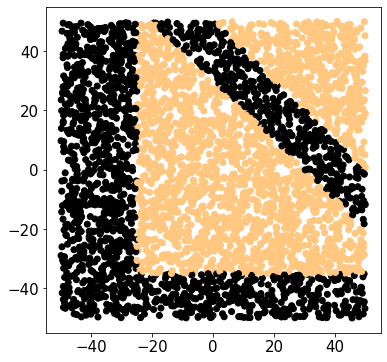

In [2]:
# Keras works with numpy arrays: just use them from the start
TYPE=1
x = np.loadtxt(filename("data",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels",TYPE), delimiter=' ')
N = len(x)

# dim. of a sample
L = len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (6,6))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

### Split training and test data

In [3]:
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


### Rescale input data

In [4]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

### Define the model with Keras / Tensorflow + Optimization method and cost function

In [5]:
# reproducibility
np.random.seed(12345)
import tensorflow.random as tf_r
tf_r.set_seed(12345)


def create_model(activation='relu',optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model
    

In [6]:
model_DNN = create_model()

print(model_DNN.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable pa

2023-03-08 15:30:12.974612: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-08 15:30:12.974638: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-08 15:30:12.974658: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Legion-5-Pro-16ACH6): /proc/driver/nvidia/version does not exist
2023-03-08 15:30:12.974894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Training

In [7]:
fit = model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),
               verbose=2)

Epoch 1/400
64/64 - 0s - loss: 0.6846 - accuracy: 0.5266 - val_loss: 0.6751 - val_accuracy: 0.5938 - 421ms/epoch - 7ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6638 - accuracy: 0.6438 - val_loss: 0.6531 - val_accuracy: 0.6550 - 75ms/epoch - 1ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6394 - accuracy: 0.6834 - val_loss: 0.6262 - val_accuracy: 0.6938 - 64ms/epoch - 1ms/step
Epoch 4/400
64/64 - 0s - loss: 0.6095 - accuracy: 0.7050 - val_loss: 0.5857 - val_accuracy: 0.7375 - 71ms/epoch - 1ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5804 - accuracy: 0.7284 - val_loss: 0.5589 - val_accuracy: 0.7362 - 106ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.5610 - accuracy: 0.7394 - val_loss: 0.5468 - val_accuracy: 0.7462 - 94ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.5439 - accuracy: 0.7528 - val_loss: 0.5326 - val_accuracy: 0.7550 - 82ms/epoch - 1ms/step
Epoch 8/400
64/64 - 0s - loss: 0.5321 - accuracy: 0.7600 - val_loss: 0.5249 - val_accuracy: 0.7625 - 97ms/epoch - 2ms/step
Epoch 9/400
64

Epoch 67/400
64/64 - 0s - loss: 0.0917 - accuracy: 0.9672 - val_loss: 0.0747 - val_accuracy: 0.9762 - 71ms/epoch - 1ms/step
Epoch 68/400
64/64 - 0s - loss: 0.0845 - accuracy: 0.9728 - val_loss: 0.0892 - val_accuracy: 0.9663 - 64ms/epoch - 1ms/step
Epoch 69/400
64/64 - 0s - loss: 0.0891 - accuracy: 0.9684 - val_loss: 0.0707 - val_accuracy: 0.9875 - 64ms/epoch - 1ms/step
Epoch 70/400
64/64 - 0s - loss: 0.0813 - accuracy: 0.9762 - val_loss: 0.0805 - val_accuracy: 0.9737 - 66ms/epoch - 1ms/step
Epoch 71/400
64/64 - 0s - loss: 0.0814 - accuracy: 0.9734 - val_loss: 0.0695 - val_accuracy: 0.9837 - 67ms/epoch - 1ms/step
Epoch 72/400
64/64 - 0s - loss: 0.0790 - accuracy: 0.9747 - val_loss: 0.0771 - val_accuracy: 0.9700 - 91ms/epoch - 1ms/step
Epoch 73/400
64/64 - 0s - loss: 0.0811 - accuracy: 0.9744 - val_loss: 0.0958 - val_accuracy: 0.9563 - 108ms/epoch - 2ms/step
Epoch 74/400
64/64 - 0s - loss: 0.0776 - accuracy: 0.9791 - val_loss: 0.0694 - val_accuracy: 0.9850 - 89ms/epoch - 1ms/step
Epoch 7

Epoch 133/400
64/64 - 0s - loss: 0.0502 - accuracy: 0.9831 - val_loss: 0.0565 - val_accuracy: 0.9750 - 69ms/epoch - 1ms/step
Epoch 134/400
64/64 - 0s - loss: 0.0582 - accuracy: 0.9784 - val_loss: 0.0476 - val_accuracy: 0.9850 - 68ms/epoch - 1ms/step
Epoch 135/400
64/64 - 0s - loss: 0.0525 - accuracy: 0.9828 - val_loss: 0.0504 - val_accuracy: 0.9850 - 70ms/epoch - 1ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0550 - accuracy: 0.9794 - val_loss: 0.0523 - val_accuracy: 0.9787 - 68ms/epoch - 1ms/step
Epoch 137/400
64/64 - 0s - loss: 0.0552 - accuracy: 0.9816 - val_loss: 0.0528 - val_accuracy: 0.9775 - 78ms/epoch - 1ms/step
Epoch 138/400
64/64 - 0s - loss: 0.0598 - accuracy: 0.9778 - val_loss: 0.0501 - val_accuracy: 0.9775 - 73ms/epoch - 1ms/step
Epoch 139/400
64/64 - 0s - loss: 0.0539 - accuracy: 0.9816 - val_loss: 0.0414 - val_accuracy: 0.9875 - 67ms/epoch - 1ms/step
Epoch 140/400
64/64 - 0s - loss: 0.0481 - accuracy: 0.9841 - val_loss: 0.0517 - val_accuracy: 0.9800 - 66ms/epoch - 1ms/step


Epoch 199/400
64/64 - 0s - loss: 0.0444 - accuracy: 0.9834 - val_loss: 0.0329 - val_accuracy: 0.9862 - 79ms/epoch - 1ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0451 - accuracy: 0.9825 - val_loss: 0.0401 - val_accuracy: 0.9837 - 59ms/epoch - 926us/step
Epoch 201/400
64/64 - 0s - loss: 0.0449 - accuracy: 0.9847 - val_loss: 0.0432 - val_accuracy: 0.9825 - 88ms/epoch - 1ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0512 - accuracy: 0.9787 - val_loss: 0.0427 - val_accuracy: 0.9825 - 98ms/epoch - 2ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0420 - accuracy: 0.9859 - val_loss: 0.0631 - val_accuracy: 0.9712 - 88ms/epoch - 1ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0559 - accuracy: 0.9778 - val_loss: 0.0355 - val_accuracy: 0.9862 - 59ms/epoch - 926us/step
Epoch 205/400
64/64 - 0s - loss: 0.0492 - accuracy: 0.9797 - val_loss: 0.0373 - val_accuracy: 0.9875 - 58ms/epoch - 900us/step
Epoch 206/400
64/64 - 0s - loss: 0.0575 - accuracy: 0.9731 - val_loss: 0.0429 - val_accuracy: 0.9812 - 64ms/epoch - 1ms

64/64 - 0s - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0395 - val_accuracy: 0.9850 - 68ms/epoch - 1ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0424 - accuracy: 0.9841 - val_loss: 0.0313 - val_accuracy: 0.9862 - 79ms/epoch - 1ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0396 - accuracy: 0.9853 - val_loss: 0.0329 - val_accuracy: 0.9850 - 84ms/epoch - 1ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0378 - accuracy: 0.9866 - val_loss: 0.0491 - val_accuracy: 0.9775 - 73ms/epoch - 1ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.0383 - val_accuracy: 0.9837 - 63ms/epoch - 986us/step
Epoch 269/400
64/64 - 0s - loss: 0.0412 - accuracy: 0.9862 - val_loss: 0.0318 - val_accuracy: 0.9887 - 68ms/epoch - 1ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0374 - accuracy: 0.9884 - val_loss: 0.0470 - val_accuracy: 0.9800 - 68ms/epoch - 1ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0389 - accuracy: 0.9856 - val_loss: 0.0706 - val_accuracy: 0.9638 - 77ms/epoch - 1ms/step
Epoch 272/40

Epoch 330/400
64/64 - 0s - loss: 0.0450 - accuracy: 0.9828 - val_loss: 0.0306 - val_accuracy: 0.9862 - 98ms/epoch - 2ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0518 - val_accuracy: 0.9775 - 73ms/epoch - 1ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0769 - accuracy: 0.9725 - val_loss: 0.0518 - val_accuracy: 0.9800 - 103ms/epoch - 2ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0341 - accuracy: 0.9856 - val_loss: 0.0320 - val_accuracy: 0.9887 - 89ms/epoch - 1ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0418 - accuracy: 0.9856 - val_loss: 0.0276 - val_accuracy: 0.9875 - 80ms/epoch - 1ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0368 - accuracy: 0.9869 - val_loss: 0.0283 - val_accuracy: 0.9900 - 83ms/epoch - 1ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0315 - accuracy: 0.9897 - val_loss: 0.0664 - val_accuracy: 0.9700 - 73ms/epoch - 1ms/step
Epoch 337/400
64/64 - 0s - loss: 0.0380 - accuracy: 0.9866 - val_loss: 0.0402 - val_accuracy: 0.9850 - 80ms/epoch - 1ms/step

Epoch 396/400
64/64 - 0s - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0326 - val_accuracy: 0.9850 - 73ms/epoch - 1ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0470 - accuracy: 0.9806 - val_loss: 0.0765 - val_accuracy: 0.9775 - 60ms/epoch - 933us/step
Epoch 398/400
64/64 - 0s - loss: 0.0466 - accuracy: 0.9816 - val_loss: 0.0364 - val_accuracy: 0.9850 - 82ms/epoch - 1ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0347 - accuracy: 0.9881 - val_loss: 0.0440 - val_accuracy: 0.9800 - 61ms/epoch - 956us/step
Epoch 400/400
64/64 - 0s - loss: 0.0382 - accuracy: 0.9844 - val_loss: 0.0387 - val_accuracy: 0.9825 - 55ms/epoch - 862us/step


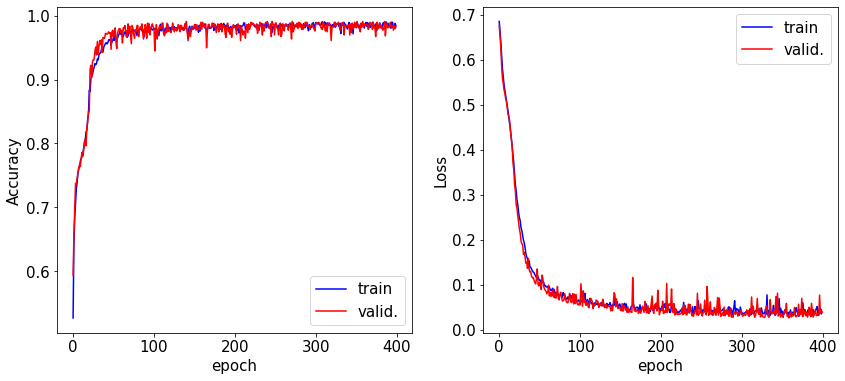

In [8]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [9]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_DNN.predict(grid_r)

51 2601
[50. 50.]
82/82 [==============================] - 0s 552us/step


<function matplotlib.pyplot.show(close=None, block=None)>

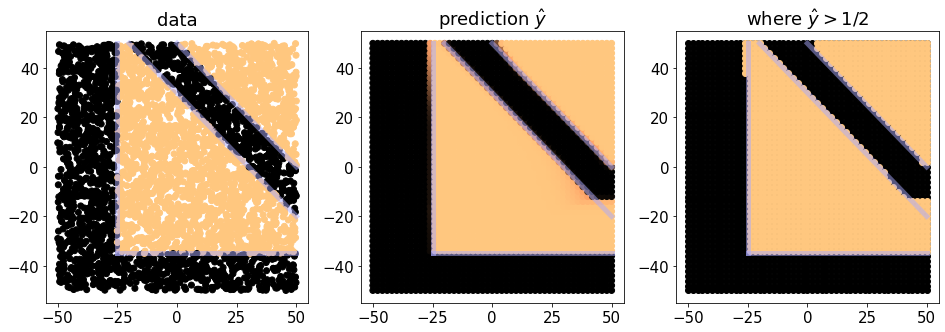

In [10]:
def boundaries():  
    x1=-25
    y1=-35
    c="#AAAAFF"
    a=0.5
    lw=5
    ax.plot((50,-20),(-20,50),c=c,alpha=a,lw=lw)
    ax.plot((50,0),(0,50),c=c,alpha=a,lw=lw)
    ax.plot((x1,50),(y1,y1),c=c,alpha=a,lw=lw)
    ax.plot((x1,x1),(y1,50),c=c,alpha=a,lw=lw)
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax.set_title("data")
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax.set_title("prediction $\\hat y$")
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#000000")
ax.scatter(grid[W1,0],grid[W1,1],c="#ffc77f")
boundaries()
ax.set_title("where $\\hat y > 1/2$")
plt.show
plt.show

## Optimization

Grid search to find the best minimization algorithm:

In [11]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
    
    
# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=create_model, 
                        epochs=1, 
                        batch_size=50, 
                        verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result_opt = grid.fit(x_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result_opt.best_score_, grid_result_opt.best_params_))
means = grid_result_opt.cv_results_['mean_test_score']
stds = grid_result_opt.cv_results_['std_test_score']
params = grid_result_opt.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/tmp/ipykernel_105074/3660728859.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_gridsearch = KerasClassifier(build_fn=create_model,


64/64 [==============================] - 1s 870us/step - loss: 0.6887 - accuracy: 0.5709
Best: 0.652812 using {'optimizer': 'Nadam'}
0.628125 (0.070680) with: {'optimizer': 'SGD'}
0.629063 (0.058346) with: {'optimizer': 'RMSprop'}
0.532500 (0.064487) with: {'optimizer': 'Adagrad'}
0.502500 (0.021287) with: {'optimizer': 'Adadelta'}
0.623125 (0.032757) with: {'optimizer': 'Adam'}
0.620625 (0.087109) with: {'optimizer': 'Adamax'}
0.652812 (0.031092) with: {'optimizer': 'Nadam'}


Grid search to find the best activation function:

In [12]:
model = create_model()
model.compile()
model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

grid = GridSearchCV(estimator=model_activation, param_grid=param_grid, n_jobs=1, cv=3)
grid_result_act = grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result_act.best_score_, grid_result_act.best_params_))
means = grid_result_act.cv_results_['mean_test_score']
stds = grid_result_act.cv_results_['std_test_score']
params = grid_result_act.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/tmp/ipykernel_105074/3280631067.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_activation = KerasClassifier(build_fn=create_model, epochs=1, batch_size=50, verbose=1)


64/64 [==============================] - 0s 769us/step - loss: 0.6498 - accuracy: 0.6275
Best: 0.727206 using {'activation': 'relu'}
0.517495 (0.013583) with: {'activation': 'softmax'}
0.564355 (0.083469) with: {'activation': 'softplus'}
0.710633 (0.021709) with: {'activation': 'softsign'}
0.727206 (0.046592) with: {'activation': 'relu'}
0.677197 (0.021302) with: {'activation': 'tanh'}
0.517495 (0.013583) with: {'activation': 'sigmoid'}
0.517495 (0.013583) with: {'activation': 'hard_sigmoid'}
0.657824 (0.027684) with: {'activation': 'linear'}


## Best DNN

In [13]:
opt = list(grid_result_opt.best_params_.values())
best_act = list(grid_result_act.best_params_.values())
best_act = best_act[0]

In [14]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

if opt[0]=='SGD':
    best_opt = keras.optimizers.SGD()
if opt[0]=='RMSprop':
    best_opt = keras.optimizers.RMSprop()
if opt[0]=='Adagrad':
    best_opt = keras.optimizers.Adagrad()
if opt[0]=='Adadelta':
    best_opt = keras.optimizers.Adadelta()
if opt[0]=='Adam':
    best_opt = keras.optimizers.Adam()
if opt[0]=='Adamax':
    best_opt = keras.optimizers.Adamax()
if opt[0]=='Nadam':
    best_opt = keras.optimizers.Nadam()


def best_model(activation=best_act,optimizer=best_opt):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dense(20,activation=activation))
    model.add(Dropout(0.01))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,           #optimization method and cost function
                  metrics=['accuracy'])
    return model

In [15]:
best_model_DNN = create_model()

print(best_model_DNN.summary())

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_280 (Dense)           (None, 2)                 6         
                                                                 
 dense_281 (Dense)           (None, 20)                60        
                                                                 
 dense_282 (Dense)           (None, 20)                420       
                                                                 
 dense_283 (Dense)           (None, 20)                420       
                                                                 
 dropout_56 (Dropout)        (None, 20)                0         
                                                                 
 dense_284 (Dense)           (None, 1)                 21        
                                                                 
Total params: 927
Trainable params: 927
Non-trainable

In [16]:
fit = best_model_DNN.fit(x_train, y_train,
               epochs = 400, batch_size = 50,
               validation_data=(x_valid,y_valid),    #fit with same amount of data
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6217 - accuracy: 0.6528 - val_loss: 0.5853 - val_accuracy: 0.6975 - 643ms/epoch - 10ms/step
Epoch 2/400
64/64 - 0s - loss: 0.5365 - accuracy: 0.7381 - val_loss: 0.5066 - val_accuracy: 0.7775 - 73ms/epoch - 1ms/step
Epoch 3/400
64/64 - 0s - loss: 0.4900 - accuracy: 0.7706 - val_loss: 0.4816 - val_accuracy: 0.7663 - 71ms/epoch - 1ms/step
Epoch 4/400
64/64 - 0s - loss: 0.4748 - accuracy: 0.7734 - val_loss: 0.4696 - val_accuracy: 0.7887 - 69ms/epoch - 1ms/step
Epoch 5/400
64/64 - 0s - loss: 0.4717 - accuracy: 0.7791 - val_loss: 0.4665 - val_accuracy: 0.7738 - 75ms/epoch - 1ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4703 - accuracy: 0.7781 - val_loss: 0.4740 - val_accuracy: 0.7738 - 66ms/epoch - 1ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4683 - accuracy: 0.7772 - val_loss: 0.4622 - val_accuracy: 0.7763 - 75ms/epoch - 1ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4705 - accuracy: 0.7759 - val_loss: 0.4670 - val_accuracy: 0.7750 - 83ms/epoch - 1ms/step
Epoch 9/400
64

Epoch 67/400
64/64 - 0s - loss: 0.2893 - accuracy: 0.8703 - val_loss: 0.2816 - val_accuracy: 0.8712 - 57ms/epoch - 898us/step
Epoch 68/400
64/64 - 0s - loss: 0.2837 - accuracy: 0.8706 - val_loss: 0.2817 - val_accuracy: 0.8712 - 55ms/epoch - 852us/step
Epoch 69/400
64/64 - 0s - loss: 0.2795 - accuracy: 0.8731 - val_loss: 0.2772 - val_accuracy: 0.8725 - 56ms/epoch - 871us/step
Epoch 70/400
64/64 - 0s - loss: 0.2804 - accuracy: 0.8694 - val_loss: 0.2756 - val_accuracy: 0.8712 - 106ms/epoch - 2ms/step
Epoch 71/400
64/64 - 0s - loss: 0.2742 - accuracy: 0.8775 - val_loss: 0.2673 - val_accuracy: 0.8838 - 100ms/epoch - 2ms/step
Epoch 72/400
64/64 - 0s - loss: 0.2760 - accuracy: 0.8763 - val_loss: 0.2719 - val_accuracy: 0.8813 - 67ms/epoch - 1ms/step
Epoch 73/400
64/64 - 0s - loss: 0.2672 - accuracy: 0.8816 - val_loss: 0.2711 - val_accuracy: 0.8662 - 58ms/epoch - 906us/step
Epoch 74/400
64/64 - 0s - loss: 0.2661 - accuracy: 0.8831 - val_loss: 0.2635 - val_accuracy: 0.8750 - 59ms/epoch - 915us/s

Epoch 133/400
64/64 - 0s - loss: 0.1002 - accuracy: 0.9678 - val_loss: 0.1138 - val_accuracy: 0.9600 - 93ms/epoch - 1ms/step
Epoch 134/400
64/64 - 0s - loss: 0.1013 - accuracy: 0.9691 - val_loss: 0.0984 - val_accuracy: 0.9688 - 58ms/epoch - 900us/step
Epoch 135/400
64/64 - 0s - loss: 0.0962 - accuracy: 0.9725 - val_loss: 0.0914 - val_accuracy: 0.9725 - 95ms/epoch - 1ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0951 - accuracy: 0.9706 - val_loss: 0.0847 - val_accuracy: 0.9762 - 84ms/epoch - 1ms/step
Epoch 137/400
64/64 - 0s - loss: 0.1007 - accuracy: 0.9641 - val_loss: 0.0955 - val_accuracy: 0.9688 - 77ms/epoch - 1ms/step
Epoch 138/400
64/64 - 0s - loss: 0.1087 - accuracy: 0.9644 - val_loss: 0.0909 - val_accuracy: 0.9688 - 82ms/epoch - 1ms/step
Epoch 139/400
64/64 - 0s - loss: 0.1004 - accuracy: 0.9656 - val_loss: 0.0856 - val_accuracy: 0.9750 - 85ms/epoch - 1ms/step
Epoch 140/400
64/64 - 0s - loss: 0.0916 - accuracy: 0.9716 - val_loss: 0.0930 - val_accuracy: 0.9688 - 74ms/epoch - 1ms/ste

Epoch 199/400
64/64 - 0s - loss: 0.0647 - accuracy: 0.9803 - val_loss: 0.0748 - val_accuracy: 0.9712 - 81ms/epoch - 1ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0649 - accuracy: 0.9781 - val_loss: 0.0572 - val_accuracy: 0.9837 - 82ms/epoch - 1ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0698 - accuracy: 0.9781 - val_loss: 0.0843 - val_accuracy: 0.9675 - 82ms/epoch - 1ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0693 - accuracy: 0.9741 - val_loss: 0.0517 - val_accuracy: 0.9850 - 82ms/epoch - 1ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0662 - accuracy: 0.9781 - val_loss: 0.0599 - val_accuracy: 0.9775 - 67ms/epoch - 1ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0756 - accuracy: 0.9722 - val_loss: 0.0554 - val_accuracy: 0.9812 - 97ms/epoch - 2ms/step
Epoch 205/400
64/64 - 0s - loss: 0.0651 - accuracy: 0.9772 - val_loss: 0.0532 - val_accuracy: 0.9812 - 81ms/epoch - 1ms/step
Epoch 206/400
64/64 - 0s - loss: 0.0636 - accuracy: 0.9787 - val_loss: 0.0836 - val_accuracy: 0.9613 - 87ms/epoch - 1ms/step


Epoch 265/400
64/64 - 0s - loss: 0.0532 - accuracy: 0.9778 - val_loss: 0.0534 - val_accuracy: 0.9762 - 96ms/epoch - 1ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0539 - accuracy: 0.9834 - val_loss: 0.0462 - val_accuracy: 0.9837 - 65ms/epoch - 1ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0631 - accuracy: 0.9769 - val_loss: 0.1544 - val_accuracy: 0.9500 - 97ms/epoch - 2ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0554 - accuracy: 0.9812 - val_loss: 0.0421 - val_accuracy: 0.9875 - 84ms/epoch - 1ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0541 - accuracy: 0.9828 - val_loss: 0.0524 - val_accuracy: 0.9700 - 67ms/epoch - 1ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0539 - accuracy: 0.9803 - val_loss: 0.0631 - val_accuracy: 0.9650 - 71ms/epoch - 1ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0580 - accuracy: 0.9781 - val_loss: 0.0411 - val_accuracy: 0.9825 - 90ms/epoch - 1ms/step
Epoch 272/400
64/64 - 0s - loss: 0.0541 - accuracy: 0.9822 - val_loss: 0.0531 - val_accuracy: 0.9725 - 66ms/epoch - 1ms/step


Epoch 331/400
64/64 - 0s - loss: 0.0428 - accuracy: 0.9844 - val_loss: 0.0354 - val_accuracy: 0.9900 - 67ms/epoch - 1ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0516 - accuracy: 0.9809 - val_loss: 0.0434 - val_accuracy: 0.9862 - 66ms/epoch - 1ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0434 - accuracy: 0.9856 - val_loss: 0.0466 - val_accuracy: 0.9762 - 69ms/epoch - 1ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0434 - accuracy: 0.9834 - val_loss: 0.0366 - val_accuracy: 0.9862 - 94ms/epoch - 1ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0336 - val_accuracy: 0.9887 - 86ms/epoch - 1ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0437 - accuracy: 0.9847 - val_loss: 0.0395 - val_accuracy: 0.9850 - 87ms/epoch - 1ms/step
Epoch 337/400
64/64 - 0s - loss: 0.0461 - accuracy: 0.9809 - val_loss: 0.0484 - val_accuracy: 0.9750 - 106ms/epoch - 2ms/step
Epoch 338/400
64/64 - 0s - loss: 0.0543 - accuracy: 0.9787 - val_loss: 0.0587 - val_accuracy: 0.9725 - 66ms/epoch - 1ms/step

Epoch 397/400
64/64 - 0s - loss: 0.0510 - accuracy: 0.9797 - val_loss: 0.1778 - val_accuracy: 0.9500 - 62ms/epoch - 976us/step
Epoch 398/400
64/64 - 0s - loss: 0.0723 - accuracy: 0.9728 - val_loss: 0.1501 - val_accuracy: 0.9513 - 84ms/epoch - 1ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0508 - accuracy: 0.9766 - val_loss: 0.0362 - val_accuracy: 0.9875 - 84ms/epoch - 1ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0417 - accuracy: 0.9841 - val_loss: 0.0411 - val_accuracy: 0.9812 - 86ms/epoch - 1ms/step


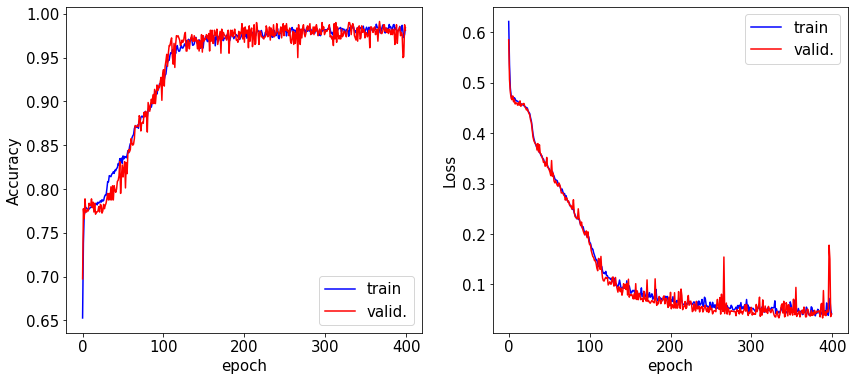

In [17]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

### Reduced data

In [19]:
#permutation = np.random.permutation(N) # random permurtation

#x = x[permutation]
#y = y[permutation]

Nr = 2000
Nr_train = int(perc_train*Nr)
xr_train = x[0:Nr_train]
yr_train = y[0:Nr_train]
xr_valid = x[Nr_train:Nr]
yr_valid = y[Nr_train:Nr]

print("Train:",len(xr_train),"\t Validation:",len(xr_valid))


xr_train = Rescale(xr_train)
xr_valid = Rescale(xr_valid)

Train: 1600 	 Validation: 400


In [20]:
fit = best_model_DNN.fit(xr_train, yr_train,
               epochs = 400, batch_size = 50,
               validation_data=(xr_valid,yr_valid),    #fit with same amount of data
               verbose=2)

Epoch 1/400
32/32 - 0s - loss: 0.0425 - accuracy: 0.9825 - val_loss: 0.0344 - val_accuracy: 0.9900 - 131ms/epoch - 4ms/step
Epoch 2/400
32/32 - 0s - loss: 0.0536 - accuracy: 0.9819 - val_loss: 0.0421 - val_accuracy: 0.9825 - 73ms/epoch - 2ms/step
Epoch 3/400
32/32 - 0s - loss: 0.0879 - accuracy: 0.9688 - val_loss: 0.3043 - val_accuracy: 0.9300 - 63ms/epoch - 2ms/step
Epoch 4/400
32/32 - 0s - loss: 0.0920 - accuracy: 0.9688 - val_loss: 0.0410 - val_accuracy: 0.9825 - 42ms/epoch - 1ms/step
Epoch 5/400
32/32 - 0s - loss: 0.0552 - accuracy: 0.9762 - val_loss: 0.0519 - val_accuracy: 0.9725 - 66ms/epoch - 2ms/step
Epoch 6/400
32/32 - 0s - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.0393 - val_accuracy: 0.9875 - 61ms/epoch - 2ms/step
Epoch 7/400
32/32 - 0s - loss: 0.0530 - accuracy: 0.9800 - val_loss: 0.0359 - val_accuracy: 0.9900 - 60ms/epoch - 2ms/step
Epoch 8/400
32/32 - 0s - loss: 0.0419 - accuracy: 0.9862 - val_loss: 0.0378 - val_accuracy: 0.9850 - 45ms/epoch - 1ms/step
Epoch 9/400
32/

Epoch 68/400
32/32 - 0s - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0489 - val_accuracy: 0.9825 - 36ms/epoch - 1ms/step
Epoch 69/400
32/32 - 0s - loss: 0.0399 - accuracy: 0.9844 - val_loss: 0.0461 - val_accuracy: 0.9800 - 36ms/epoch - 1ms/step
Epoch 70/400
32/32 - 0s - loss: 0.0337 - accuracy: 0.9900 - val_loss: 0.0503 - val_accuracy: 0.9850 - 35ms/epoch - 1ms/step
Epoch 71/400
32/32 - 0s - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0475 - val_accuracy: 0.9825 - 36ms/epoch - 1ms/step
Epoch 72/400
32/32 - 0s - loss: 0.0330 - accuracy: 0.9919 - val_loss: 0.0435 - val_accuracy: 0.9825 - 35ms/epoch - 1ms/step
Epoch 73/400
32/32 - 0s - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0984 - val_accuracy: 0.9675 - 35ms/epoch - 1ms/step
Epoch 74/400
32/32 - 0s - loss: 0.0644 - accuracy: 0.9762 - val_loss: 0.0458 - val_accuracy: 0.9875 - 37ms/epoch - 1ms/step
Epoch 75/400
32/32 - 0s - loss: 0.0379 - accuracy: 0.9837 - val_loss: 0.0443 - val_accuracy: 0.9825 - 36ms/epoch - 1ms/step
Epoch 76

Epoch 134/400
32/32 - 0s - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0506 - val_accuracy: 0.9725 - 61ms/epoch - 2ms/step
Epoch 135/400
32/32 - 0s - loss: 0.0316 - accuracy: 0.9881 - val_loss: 0.0724 - val_accuracy: 0.9750 - 50ms/epoch - 2ms/step
Epoch 136/400
32/32 - 0s - loss: 0.0399 - accuracy: 0.9862 - val_loss: 0.0425 - val_accuracy: 0.9850 - 59ms/epoch - 2ms/step
Epoch 137/400
32/32 - 0s - loss: 0.0386 - accuracy: 0.9844 - val_loss: 0.0458 - val_accuracy: 0.9775 - 60ms/epoch - 2ms/step
Epoch 138/400
32/32 - 0s - loss: 0.0320 - accuracy: 0.9887 - val_loss: 0.0455 - val_accuracy: 0.9825 - 61ms/epoch - 2ms/step
Epoch 139/400
32/32 - 0s - loss: 0.0337 - accuracy: 0.9869 - val_loss: 0.0726 - val_accuracy: 0.9625 - 60ms/epoch - 2ms/step
Epoch 140/400
32/32 - 0s - loss: 0.0525 - accuracy: 0.9794 - val_loss: 0.0386 - val_accuracy: 0.9850 - 57ms/epoch - 2ms/step
Epoch 141/400
32/32 - 0s - loss: 0.0313 - accuracy: 0.9881 - val_loss: 0.0411 - val_accuracy: 0.9875 - 57ms/epoch - 2ms/step


Epoch 200/400
32/32 - 0s - loss: 0.0274 - accuracy: 0.9900 - val_loss: 0.0694 - val_accuracy: 0.9675 - 52ms/epoch - 2ms/step
Epoch 201/400
32/32 - 0s - loss: 0.0328 - accuracy: 0.9887 - val_loss: 0.0420 - val_accuracy: 0.9875 - 54ms/epoch - 2ms/step
Epoch 202/400
32/32 - 0s - loss: 0.0320 - accuracy: 0.9856 - val_loss: 0.0696 - val_accuracy: 0.9675 - 66ms/epoch - 2ms/step
Epoch 203/400
32/32 - 0s - loss: 0.0243 - accuracy: 0.9912 - val_loss: 0.0422 - val_accuracy: 0.9875 - 71ms/epoch - 2ms/step
Epoch 204/400
32/32 - 0s - loss: 0.0311 - accuracy: 0.9887 - val_loss: 0.0401 - val_accuracy: 0.9875 - 55ms/epoch - 2ms/step
Epoch 205/400
32/32 - 0s - loss: 0.0354 - accuracy: 0.9869 - val_loss: 0.0398 - val_accuracy: 0.9875 - 44ms/epoch - 1ms/step
Epoch 206/400
32/32 - 0s - loss: 0.0329 - accuracy: 0.9881 - val_loss: 0.0419 - val_accuracy: 0.9875 - 50ms/epoch - 2ms/step
Epoch 207/400
32/32 - 0s - loss: 0.0617 - accuracy: 0.9762 - val_loss: 0.0432 - val_accuracy: 0.9750 - 58ms/epoch - 2ms/step


Epoch 266/400
32/32 - 0s - loss: 0.0506 - accuracy: 0.9769 - val_loss: 0.0464 - val_accuracy: 0.9800 - 37ms/epoch - 1ms/step
Epoch 267/400
32/32 - 0s - loss: 0.0277 - accuracy: 0.9881 - val_loss: 0.0384 - val_accuracy: 0.9875 - 43ms/epoch - 1ms/step
Epoch 268/400
32/32 - 0s - loss: 0.0266 - accuracy: 0.9906 - val_loss: 0.0408 - val_accuracy: 0.9875 - 38ms/epoch - 1ms/step
Epoch 269/400
32/32 - 0s - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.0385 - val_accuracy: 0.9850 - 36ms/epoch - 1ms/step
Epoch 270/400
32/32 - 0s - loss: 0.0317 - accuracy: 0.9850 - val_loss: 0.0403 - val_accuracy: 0.9825 - 55ms/epoch - 2ms/step
Epoch 271/400
32/32 - 0s - loss: 0.0305 - accuracy: 0.9875 - val_loss: 0.0375 - val_accuracy: 0.9950 - 47ms/epoch - 1ms/step
Epoch 272/400
32/32 - 0s - loss: 0.0301 - accuracy: 0.9894 - val_loss: 0.0689 - val_accuracy: 0.9725 - 55ms/epoch - 2ms/step
Epoch 273/400
32/32 - 0s - loss: 0.0351 - accuracy: 0.9862 - val_loss: 0.0411 - val_accuracy: 0.9850 - 45ms/epoch - 1ms/step


Epoch 332/400
32/32 - 0s - loss: 0.0443 - accuracy: 0.9800 - val_loss: 0.0422 - val_accuracy: 0.9775 - 37ms/epoch - 1ms/step
Epoch 333/400
32/32 - 0s - loss: 0.0398 - accuracy: 0.9831 - val_loss: 0.0321 - val_accuracy: 0.9900 - 41ms/epoch - 1ms/step
Epoch 334/400
32/32 - 0s - loss: 0.0298 - accuracy: 0.9887 - val_loss: 0.0531 - val_accuracy: 0.9800 - 65ms/epoch - 2ms/step
Epoch 335/400
32/32 - 0s - loss: 0.0240 - accuracy: 0.9906 - val_loss: 0.0366 - val_accuracy: 0.9825 - 53ms/epoch - 2ms/step
Epoch 336/400
32/32 - 0s - loss: 0.0205 - accuracy: 0.9944 - val_loss: 0.0337 - val_accuracy: 0.9875 - 59ms/epoch - 2ms/step
Epoch 337/400
32/32 - 0s - loss: 0.0259 - accuracy: 0.9894 - val_loss: 0.0522 - val_accuracy: 0.9775 - 66ms/epoch - 2ms/step
Epoch 338/400
32/32 - 0s - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0566 - val_accuracy: 0.9750 - 57ms/epoch - 2ms/step
Epoch 339/400
32/32 - 0s - loss: 0.0337 - accuracy: 0.9869 - val_loss: 0.1146 - val_accuracy: 0.9600 - 63ms/epoch - 2ms/step


Epoch 398/400
32/32 - 0s - loss: 0.0407 - accuracy: 0.9831 - val_loss: 0.0425 - val_accuracy: 0.9800 - 56ms/epoch - 2ms/step
Epoch 399/400
32/32 - 0s - loss: 0.0250 - accuracy: 0.9906 - val_loss: 0.0510 - val_accuracy: 0.9800 - 50ms/epoch - 2ms/step
Epoch 400/400
32/32 - 0s - loss: 0.0360 - accuracy: 0.9875 - val_loss: 0.0486 - val_accuracy: 0.9775 - 44ms/epoch - 1ms/step


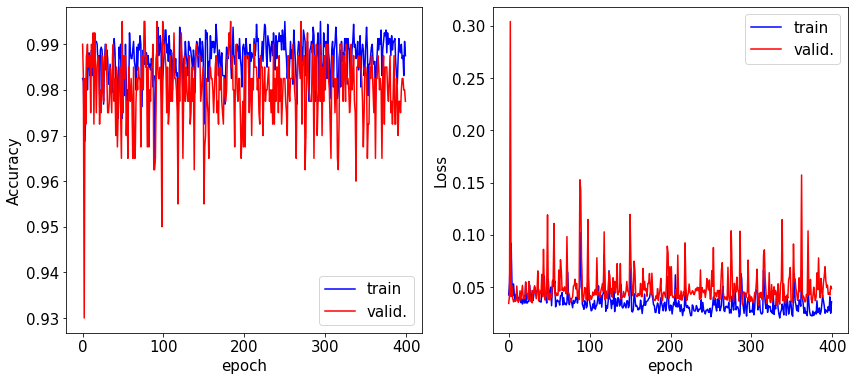

In [21]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train",c="b")
ax.plot(fit.history['val_accuracy'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax.legend()
ax=AX[1]
ax.plot(fit.history['loss'],label="train",c="b")
ax.plot(fit.history['val_loss'],label="valid.",c="r")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()